In [ ]:
import pandas as pd
import torch
from transformers import AutoTokenizer,AutoModel
import re
from sklearn.model_selection import train_test_split
# Feature engineering
from sklearn.feature_extraction.text import TfidfVectorizer
from google.colab import drive
drive.mount("/content/drive")


Mounted at /content/drive


In [ ]:
# Read data

df = pd.DataFrame()
df = pd.read_csv("/content/drive/MyDrive/1 nùi Project/Machine learning/Gắn tag cho bình luận/Data/Training file/Train.csv", encoding="utf-8")

In [ ]:
# reset data index

df = df.reset_index(drop=True)
df=df.astype(str)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3492 entries, 0 to 3491
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       3492 non-null   object
 1   cmt              3492 non-null   object
 2   Spell_corrected  3492 non-null   object
 3   tên              3492 non-null   object
 4   vận chuyển       3492 non-null   object
 5   giá              3492 non-null   object
 6   đóng gói         3492 non-null   object
 7   dịch vụ          3492 non-null   object
 8   mùi hương        3492 non-null   object
 9   chất lượng       3492 non-null   object
 10  kết cấu          3492 non-null   object
 11  độ bền           3492 non-null   object
 12  Màu sắc          3492 non-null   object
 13  tokenized_text   3492 non-null   object
dtypes: object(14)
memory usage: 382.1+ KB
None


In [ ]:
# processing on the copy of the data
dw = df.copy()

In [ ]:
# Multi Label Pkgs
from skmultilearn.problem_transform import BinaryRelevance
from skmultilearn.problem_transform import ClassifierChain
from skmultilearn.problem_transform import LabelPowerset
from skmultilearn.adapt import MLkNN

In [ ]:
# ML Pkgs
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.metrics import accuracy_score,hamming_loss,classification_report

### Vectorization

vectorization with Tf-idf

In [ ]:
tfidf = TfidfVectorizer(max_features=1000, ngram_range=(1, 2), min_df=2, max_df=0.8)
corpus = dw['cmt']
Xfeatures = tfidf.fit_transform(corpus).toarray()

vectorization with Word2vec

In [ ]:
# from underthesea import word_tokenize
# import nltk
# from nltk.tokenize import word_tokenize
# nltk.download('punkt')

In [ ]:
# Xfeatures = dw['cmt']
# tokenized_Xfeatures = Xfeatures.apply(lambda x: word_tokenize(x))

In [ ]:
# from gensim.models import Word2Vec
# model = Word2Vec(tokenized_Xfeatures, min_count = 1, vector_size = 50, window = 5, sg = 1, workers = 4)
# model.train(tokenized_Xfeatures, total_examples = model.corpus_count, epochs = 10)

In [ ]:
# def get_sentence_embedding(sentence, model, vector_size):
#     words = sentence.split()  # Tách câu thành từng từ
#     word_embeddings = [model.wv[word] for word in words if word in model.wv]  # Lấy embedding của từ trong từ điển của mô hình
#     if len(word_embeddings) > 0:
#         # Trả về trung bình của các embedding nếu có từ nào trong từ điển của mô hình
#         return sum(word_embeddings) / len(word_embeddings)
#     else:
#         # Trả về zero vector nếu không có từ nào trong từ điển của mô hình
#         return [0] * vector_size

# # Tạo cột mới trong DataFrame để lưu trữ embedding
# Xfeatures = dw['cmt'].apply(lambda x: get_sentence_embedding(x, model, model.vector_size))


vectorization with Bag of word

In [ ]:
# tokenised_cmt= dw['cmt'].apply(lambda x: x.split())
# tokenised_cmt.head()

In [ ]:
# #bag of word features
# from sklearn.feature_extraction.text import CountVectorizer

# corpus = dw['cmt']
# bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000)
# Xfeatures=bow_vectorizer.fit_transform(corpus)

In [ ]:
dw.dtypes

Unnamed: 0         object
cmt                object
Spell_corrected    object
tên                object
vận chuyển         object
giá                object
đóng gói           object
dịch vụ            object
mùi hương          object
chất lượng         object
kết cấu            object
độ bền             object
Màu sắc            object
tokenized_text     object
dtype: object

In [ ]:
dw['chất lượng'] = dw['chất lượng'].astype(float)
dw['kết cấu'] = dw['kết cấu'].astype(float)
dw['vận chuyển'] = dw['vận chuyển'].astype(float)
dw['giá'] = dw['giá'].astype(float)
dw['đóng gói'] = dw['đóng gói'].astype(float)
dw['dịch vụ'] = dw['dịch vụ'].astype(float)
dw['mùi hương'] = dw['mùi hương'].astype(float)
dw['độ bền'] = dw['độ bền'].astype(float)
dw['Màu sắc'] = dw['Màu sắc'].astype(float)

In [ ]:
dw.columns

Index(['Unnamed: 0', 'cmt', 'Spell_corrected', 'tên', 'vận chuyển', 'giá',
       'đóng gói', 'dịch vụ', 'mùi hương', 'chất lượng', 'kết cấu', 'độ bền',
       'Màu sắc', 'tokenized_text'],
      dtype='object')

## Visualize data

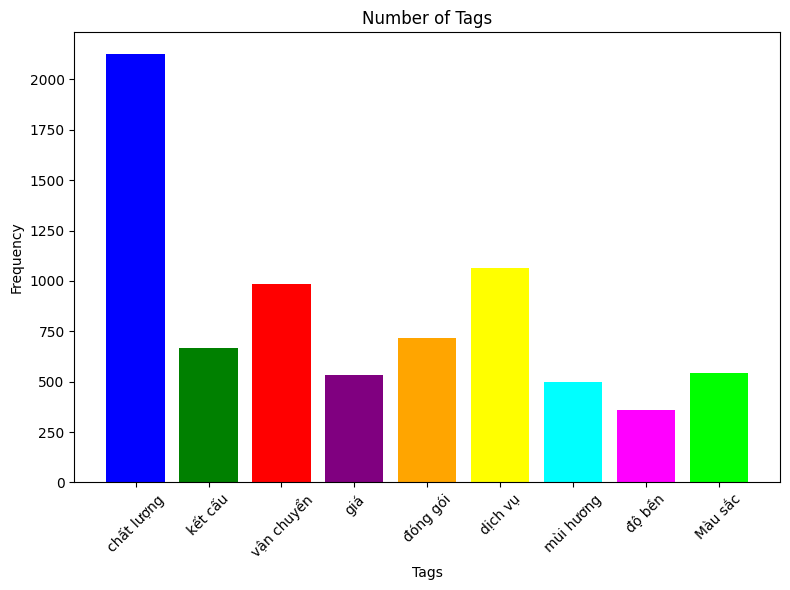

In [ ]:
import matplotlib.pyplot as plt

colors = ['blue', 'green', 'red', 'purple', 'orange', 'yellow', 'cyan', 'magenta', 'lime']
type_counts = dw[['chất lượng', 'kết cấu', 'vận chuyển', 'giá', 'đóng gói', 'dịch vụ', 'mùi hương', 'độ bền', 'Màu sắc']].sum()

tags = type_counts.index.tolist()
counts = type_counts.tolist()

plt.figure(figsize=(8, 6))
plt.bar(tags, counts, color=colors)
plt.xlabel('Tags')
plt.ylabel('Frequency')
plt.title('Number of Tags')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Data splitting

In [ ]:
y = dw[['vận chuyển', 'giá', 'đóng gói', 'dịch vụ', 'mùi hương', 'kết cấu', 'độ bền', 'Màu sắc']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(Xfeatures, y, test_size=0.2, random_state=42)

In [ ]:
print(X_train.shape), print(y_train.shape)
print(X_test.shape), print(y_test.shape)

(2793, 1000)
(2793, 8)
(699, 1000)
(699, 8)


(None, None)

In [ ]:
print(dw['cmt'].shape)
print(X_train.shape)

(3492,)
(2793, 1000)


## Train model

In [ ]:
from sklearn.metrics import f1_score, make_scorer, precision_score, recall_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

Training with BinaryRelevance method

In [ ]:
binary_rel_clf = BinaryRelevance(MultinomialNB())
binary_rel_clf.fit(X_train,y_train)

BinaryRelevance(classifier=MultinomialNB(), require_dense=[True, True])

In [ ]:
binary_rel_clf = BinaryRelevance(MultinomialNB())
binary_rel_clf.fit(X_train,y_train)
br_prediction = binary_rel_clf.predict(X_test)
print(br_prediction.toarray())
print(y_test)

[[1. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
      vận chuyển  giá  đóng gói  dịch vụ  mùi hương  kết cấu  độ bền  Màu sắc
295          1.0  0.0       1.0      1.0        0.0      0.0     0.0      0.0
718          0.0  0.0       0.0      1.0        0.0      0.0     0.0      0.0
952          0.0  0.0       0.0      1.0        0.0      0.0     0.0      1.0
2561         0.0  0.0       0.0      0.0        0.0      0.0     0.0      0.0
2547         0.0  0.0       0.0      1.0        0.0      0.0     0.0      0.0
...          ...  ...       ...      ...        ...      ...     ...      ...
631          0.0  0.0       0.0      0.0        0.0      0.0     0.0      0.0
1551         0.0  0.0       0.0      0.0        0.0      1.0     1.0      0.0
2880         0.0  0.0       0.0      0.0        0.0      0.0     1.0      0.0
162          1.0  1.0       0.0      1.0        0.0      0.0    

In [ ]:
# Evaluate the performance of the model on the test set
accuracy_test = accuracy_score(y_test, br_prediction)
print(f"Accuracy trên tập test: {accuracy_test:.2f}")

micro_f1 = f1_score(y_test, br_prediction, average='micro')
print(f"Micro-average F1 score: {micro_f1}")

# Calculate macro-average F1 score
macro_f1 = f1_score(y_test, br_prediction, average='macro')
print(f"Macro-average F1 score: {macro_f1}")

Accuracy trên tập test: 0.48
Micro-average F1 score: 0.6818181818181818
Macro-average F1 score: 0.6272561391301671


In [ ]:
# Evaluate through cross-validation.
pred = binary_rel_clf.fit(X_train, y_train)

scorings = ['precision_macro', 'precision_micro', 'f1_macro', 'f1_micro', 'recall_macro', 'recall_micro']

scores = cross_validate(pred, X_train, y_train, cv=5, scoring=scorings)

for metric in scorings:
    score_key = f'test_{metric}'
    metric_scores = scores[score_key]
    print(f"{metric} scores: {metric_scores}\n")

precision_macro scores: [0.90022939 0.90039221 0.91310878 0.91177943 0.9001538 ]

precision_micro scores: [0.85741811 0.89173228 0.88293651 0.8987069  0.884     ]

f1_macro scores: [0.58181361 0.58355362 0.59010041 0.61622254 0.59950572]

f1_micro scores: [0.64821559 0.65938865 0.65682657 0.66401274 0.65481481]

recall_macro scores: [0.4671814  0.47350407 0.46898477 0.48339891 0.47946355]

recall_micro scores: [0.52107728 0.52309469 0.52291422 0.52651515 0.52      ]



In [ ]:
# Evaluate through loss function."
hamming_loss(y_test,br_prediction)

0.10515021459227468

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [ ]:
# Find the best parameter
parameters = [
    {
        'classifier': [MultinomialNB()],
        'classifier__alpha': [0.7, 1.0, 1.3],
    },
    {
        'classifier': [RandomForestClassifier()],
        'classifier__criterion': ['gini', 'entropy'],
        'classifier__n_estimators': [50, 100, 150],
    },
    {
        'classifier': [KNeighborsClassifier()],
        'classifier__n_neighbors': [2, 3, 5, 8, 9],
        'classifier__weights': ['uniform', 'distance'],
    },
    {
        'classifier': [SVC()],
        'classifier__C': [0.01, 0.1, 1.0],
        'classifier__kernel': ['linear', 'rbf', 'sigmoid'],
    },
    {
        'classifier': [LogisticRegression()],
        'classifier__C': [0.01, 0.1, 1.0],
        'classifier__max_iter': [50, 100, 200],
    }
]

scores = ['f1_micro', 'f1_macro', 'precision_micro', 'precision_macro', 'recall_micro', 'recall_macro']

clf = GridSearchCV(BinaryRelevance(), parameters, scoring=scores, refit=False)
clf.fit(X_train, y_train)
# print (clf.best_params_, clf.best_score_)

print("\nAccuracy for each parameter set:")
for i in range(len(clf.cv_results_['params'])):
    for scorer in scores:
        mean_score = clf.cv_results_[f"mean_test_{scorer}"][i]
        print(f"Parameter set {i+1}: {clf.cv_results_['params'][i]} - Mean {scorer}: {mean_score}\n")

In [ ]:
# Print the best parameter depend on mean_test_f1_micro
best_score_idx = clf.cv_results_['mean_test_f1_micro'].argmax()
best_params = {k.replace('classifier__', ''): v for k, v in clf.cv_results_['params'][best_score_idx].items()}
print(f"Best parameters: {best_params} - Mean f1_micro: {clf.cv_results_['mean_test_f1_micro'][best_score_idx]}")

In [ ]:
from sklearn.metrics import hamming_loss

# best model selection
best_model_idx = clf.cv_results_['mean_test_f1_micro'].argmax()
best_params = {k.replace('classifier__', ''): v for k, v in clf.cv_results_['params'][best_model_idx].items()}

# create the best model
best_model = BinaryRelevance(best_params['classifier'])
best_model.fit(X_train, y_train)

# "Prediction on the test set."
y_pred = best_model.predict(X_test)

# Calculate hamming_loss
hamming_loss_value = hamming_loss(y_test, y_pred)
print("Hamming Loss:", hamming_loss_value)

Training model with LabelPowerset method

In [ ]:
clf = LabelPowerset(MultinomialNB())

clf.fit(X_train, y_train)
clf_prediction = clf.predict(X_test)

# Evaluate the performance of the model on the test set
accuracy_test = accuracy_score(y_test, clf_prediction)
print(f"Accuracy trên tập test: {accuracy_test}")

micro_f1 = f1_score(y_test, clf_prediction, average='micro')
print(f"Micro-average F1 score: {micro_f1}")

# Calculate macro-average F1 score
macro_f1 = f1_score(y_test, clf_prediction, average='macro')
print(f"Macro-average F1 score: {macro_f1}")

In [ ]:
# Evaluate through cross-validation.
pred = clf.fit(X_train, y_train)

scorings = ['precision_macro', 'precision_micro', 'f1_macro', 'f1_micro', 'recall_macro', 'recall_micro']

scores = cross_validate(pred, X_train, y_train, cv=5, scoring=scorings)

for metric in scorings:
    score_key = f'test_{metric}'
    metric_scores = scores[score_key]
    print(f"{metric} scores: {metric_scores}\n")

In [ ]:
# Evaluate through loss function
hamming_loss(y_test, clf_prediction)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Find the best parameter
parameters = [
    {
        'classifier': [MultinomialNB()],
        'classifier__alpha': [0.7, 1.0, 1.3],
    },
    {
        'classifier': [RandomForestClassifier()],
        'classifier__criterion': ['gini', 'entropy'],
        'classifier__n_estimators': [50, 100, 150],
    },
    {
        'classifier': [KNeighborsClassifier()],
        'classifier__n_neighbors': [2, 3, 5, 8, 9],
        'classifier__weights': ['uniform', 'distance'],
    },
    {
        'classifier': [SVC()],
        'classifier__C': [0.01, 0.1, 1.0],
        'classifier__kernel': ['linear', 'rbf', 'sigmoid'],
    },
    {
        'classifier': [LogisticRegression()],
        'classifier__C': [0.01, 0.1, 1.0],
        'classifier__max_iter': [50, 100, 200],
    }
]

scores = ['f1_micro', 'f1_macro', 'precision_micro', 'precision_macro', 'recall_micro', 'recall_macro']

clf = GridSearchCV(LabelPowerset(), parameters, scoring=scores, refit=False)
clf.fit(X_train, y_train)


print("\nAccuracy for each parameter set:")
for i in range(len(clf.cv_results_['params'])):
    for scorer in scores:
        mean_score = clf.cv_results_[f"mean_test_{scorer}"][i]
        print(f"Parameter set {i+1}: {clf.cv_results_['params'][i]} - Mean {scorer}: {mean_score}\n")

In [ ]:
# Print the best parameter
best_score_idx = clf.cv_results_['mean_test_f1_micro'].argmax()
best_params = {k.replace('classifier__', ''): v for k, v in clf.cv_results_['params'][best_score_idx].items()}
print(f"Best parameters: {best_params} - Mean f1_micro: {clf.cv_results_['mean_test_f1_micro'][best_score_idx]}")

In [ ]:
# best model selection
best_model_idx = clf.cv_results_['mean_test_f1_micro'].argmax()
best_params = {k.replace('classifier__', ''): v for k, v in clf.cv_results_['params'][best_model_idx].items()}

# create the best model
best_model = LabelPowerset(best_params['classifier'])
best_model.fit(X_train, y_train)

# Prediction on test set
y_pred = best_model.predict(X_test)

# Calculate hamming_loss
hamming_loss_value = hamming_loss(y_test, y_pred)
print("Hamming Loss:", hamming_loss_value)

Training model with Classifier Chains method


In [ ]:
cc = ClassifierChain(MultinomialNB())
cc.fit(X_train, y_train)

cc_predictions = cc.predict(X_test)

# Check For Accuracy
accuracy_test = accuracy_score(y_test, cc_predictions)
print(f"Accuracy trên tập test: {accuracy_test}")

micro_precison = precision_score(y_test, cc_predictions, average='micro')
print(f"Micro-average Precision score: {micro_precison}")

# Calculate macro-average F1 score
macro_precison = precision_score(y_test, cc_predictions, average='macro')
print(f"Macro-average Precision score: {macro_precison}")

In [ ]:
pred = cc.fit(X_train, y_train)

scorings = ['precision_macro', 'precision_micro', 'f1_macro', 'f1_micro', 'recall_macro', 'recall_micro']

scores = cross_validate(pred, X_train, y_train, cv=5, scoring=scorings)

for metric in scorings:
    score_key = f'test_{metric}'
    metric_scores = scores[score_key]
    print(f"{metric} scores: {metric_scores}\n")

In [ ]:
hamming_loss(y_test, cc_predictions)

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import multilabel_confusion_matrix
import numpy as np

In [ ]:
labels = ['vận chuyển', 'giá', 'đóng gói', 'dịch vụ', 'mùi hương', 'kết cấu', 'độ bền', 'màu sắc']
print(classification_report(y_test, cc_predictions, target_names=labels))

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

parameters = [
    {
        'classifier': [MultinomialNB()],
        'classifier__alpha': [0.7, 1.0, 1.3],
    },
    {
        'classifier': [RandomForestClassifier()],
        'classifier__criterion': ['gini', 'entropy'],
        'classifier__n_estimators': [50, 100, 150],
    },
    {
        'classifier': [KNeighborsClassifier()],
        'classifier__n_neighbors': [2, 3, 5, 8, 9],
        'classifier__weights': ['uniform', 'distance'],
    },
    {
        'classifier': [SVC()],
        'classifier__C': [0.01, 0.1, 1.0],
        'classifier__kernel': ['linear', 'rbf', 'sigmoid'],
    },
    {
        'classifier': [LogisticRegression()],
        'classifier__C': [0.01, 0.1, 1.0],
        'classifier__max_iter': [50, 100, 200],
    }
]

scores = ['f1_micro', 'f1_macro', 'precision_micro', 'precision_macro', 'recall_micro', 'recall_macro']

clf = GridSearchCV(ClassifierChain(), parameters, scoring=scores, refit=False)
clf.fit(X_train, y_train)
# print (clf.best_params_, clf.best_score_)

print("\nAccuracy for each parameter set:")
for i in range(len(clf.cv_results_['params'])):
    for scorer in scores:
        mean_score = clf.cv_results_[f"mean_test_{scorer}"][i]
        print(f"Parameter set {i+1}: {clf.cv_results_['params'][i]} - Mean {scorer}: {mean_score}\n")

In [ ]:
best_score_idx = clf.cv_results_['mean_test_f1_micro'].argmax()
best_params = {k.replace('classifier__', ''): v for k, v in clf.cv_results_['params'][best_score_idx].items()}
print(f"Best parameters: {best_params} - Mean f1_micro: {clf.cv_results_['mean_test_f1_micro'][best_score_idx]}")

In [ ]:
# best model selection
best_model_idx = clf.cv_results_['mean_test_f1_micro'].argmax()
best_params = {k.replace('classifier__', ''): v for k, v in clf.cv_results_['params'][best_model_idx].items()}

# ceate the best model
best_model = ClassifierChain(best_params['classifier'])
best_model.fit(X_train, y_train)

# Prediction on the test set
y_pred = best_model.predict(X_test)

# Calculate hamming_loss
hamming_loss_value = hamming_loss(y_test, y_pred)
print("Hamming Loss:", hamming_loss_value)